This project is meant to predict and detect anomalies on triphasic motors using the following dataset:                                                                                                                                                                                              
https://drive.google.com/drive/folders/1d70I-XacHhA7i7MsVQa-iFJvp2nTiayA

In [66]:
#!pip install nixtla

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nixtla import NixtlaClient
import os


In [68]:
#api config
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-CTYlY4bXXnUAKK84Rw7FhEIhwwYt97jkNGnwkT10totonfAxUky0GkjXVnxIOva5aSszvlxb0fayv9Gi'
)

In [69]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [70]:
#loading the dataset
local_path = os.getcwd()

s3 =  "s3Files"

dataset_path = os.path.join(local_path,"dataset" , s3, "data2.txt")

dataset = pd.read_csv(dataset_path, sep=",", header=None)

In [71]:
dataset

,0,1,2,3,4
0,NaN,2102,2318,97,NaN
1,NaN,2095,2326,94,NaN
2,NaN,2087,2336,78,NaN
3,NaN,1867,2429,283,NaN
4,NaN,1862,2430,297,NaN
...,...,...,...,...,...
9995,NaN,1809,2135,789,NaN
9996,NaN,1816,2136,790,NaN
9997,NaN,1824,2122,790,NaN
9998,NaN,1829,2121,791,NaN


In [72]:

dataset = dataset.dropna(axis=1)

In [73]:
dataset

,1,2,3
0,2102,2318,97
1,2095,2326,94
2,2087,2336,78
3,1867,2429,283
4,1862,2430,297
...,...,...,...
9995,1809,2135,789
9996,1816,2136,790
9997,1824,2122,790
9998,1829,2121,791


In [74]:
dataset['timestamp'] = np.arange(len(dataset))

start_date = pd.to_datetime('2024-01-01 00:00:00')

dataset['timestamp'] = start_date + pd.to_timedelta(dataset['timestamp'], unit='s')



C:\Users\jpedr\AppData\Local\Temp\ipykernel_15572\3581336818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['timestamp'] = np.arange(len(dataset))
C:\Users\jpedr\AppData\Local\Temp\ipykernel_15572\3581336818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['timestamp'] = start_date + pd.to_timedelta(dataset['timestamp'], unit='s')


In [75]:
cols = list(dataset.columns)
cols = [cols[-1]] + cols[:-1]

dataset = dataset[cols]

In [76]:
dataset = dataset.rename(columns={1: 'va', 2: 'vb', 3: 'vc'})

In [77]:
dataset

,timestamp,va,vb,vc
0,2024-01-01 00:00:00,2102,2318,97
1,2024-01-01 00:00:01,2095,2326,94
2,2024-01-01 00:00:02,2087,2336,78
3,2024-01-01 00:00:03,1867,2429,283
4,2024-01-01 00:00:04,1862,2430,297
...,...,...,...,...
9995,2024-01-01 02:46:35,1809,2135,789
9996,2024-01-01 02:46:36,1816,2136,790
9997,2024-01-01 02:46:37,1824,2122,790
9998,2024-01-01 02:46:38,1829,2121,791


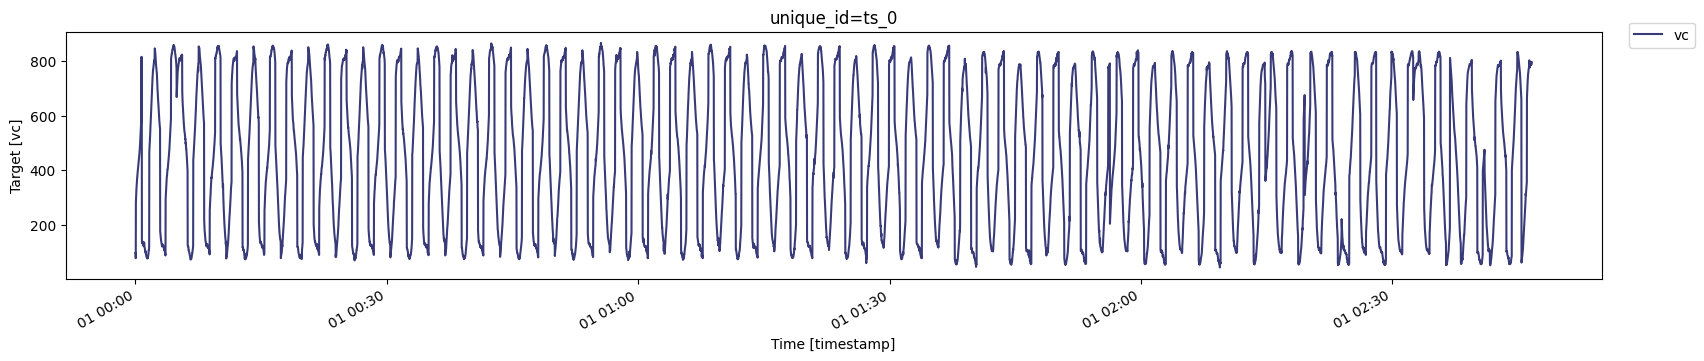

In [78]:
nixtla_client.plot(dataset, time_col='timestamp', target_col='va')
nixtla_client.plot(dataset, time_col='timestamp', target_col='vb')
nixtla_client.plot(dataset, time_col='timestamp', target_col='vc')


In [79]:
#calculate mean voltage and add to output
dataset['y'] = dataset[['va', 'vb', 'vc']].mean(axis=1)

In [80]:
H = 20

In [81]:
test_dataset = dataset.iloc[10000-H:]
dataset =  dataset.iloc[:10000-H]

In [82]:
#predict the mean voltage
anomalies_df = nixtla_client.detect_anomalies(dataset, time_col='timestamp', target_col="y") 

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: s
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...
INFO:nixtla.nixtla_client:Using the following exogenous variables: va, vb, vc


In [83]:
anomalies_df

,timestamp,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
0,2024-01-01 00:02:20,0,1595.485522,1600.112035,1604.738548
1,2024-01-01 00:02:21,0,1595.271371,1599.897884,1604.524397
2,2024-01-01 00:02:22,0,1591.306783,1595.933296,1600.559809
3,2024-01-01 00:02:23,0,1591.816922,1596.443435,1601.069949
4,2024-01-01 00:02:24,0,1589.516311,1594.142824,1598.769337
...,...,...,...,...,...
9835,2024-01-01 02:46:15,0,1566.193153,1570.819667,1575.446180
9836,2024-01-01 02:46:16,0,1569.620484,1574.246997,1578.873510
9837,2024-01-01 02:46:17,0,1572.837432,1577.463945,1582.090458
9838,2024-01-01 02:46:18,0,1570.276880,1574.903393,1579.529907


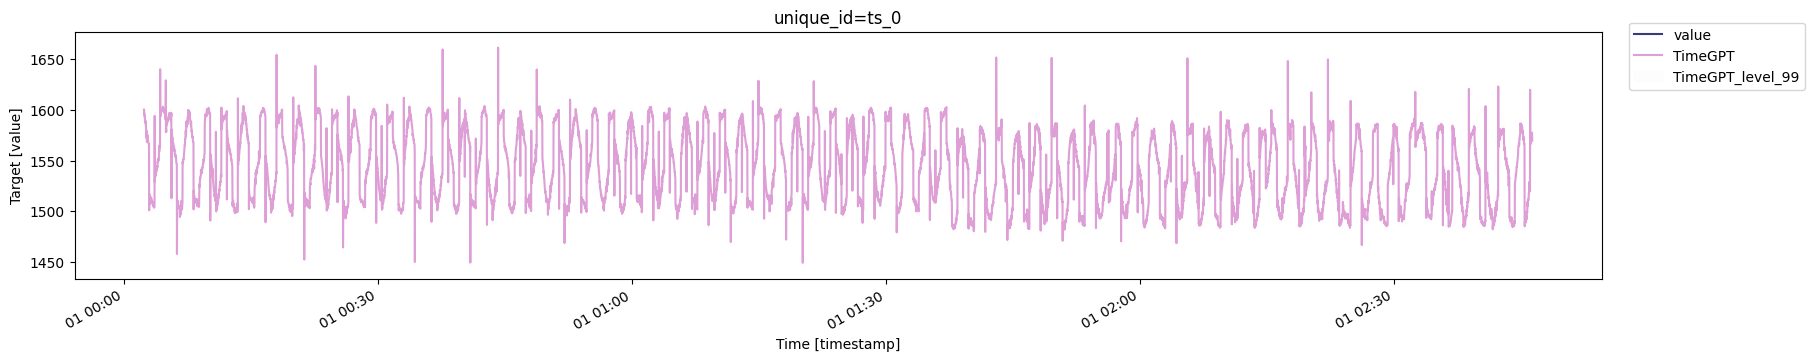

In [84]:
# Plot predictions
nixtla_client.plot(
    dataset,
    anomalies_df, 
    time_col='timestamp', 
    target_col="value"
)

In [85]:
#print anomalies detected where anomaly is 1
print("Anomalies detected: ", len(anomalies_df[anomalies_df['anomaly'] == 1]))

Anomalies detected:  208


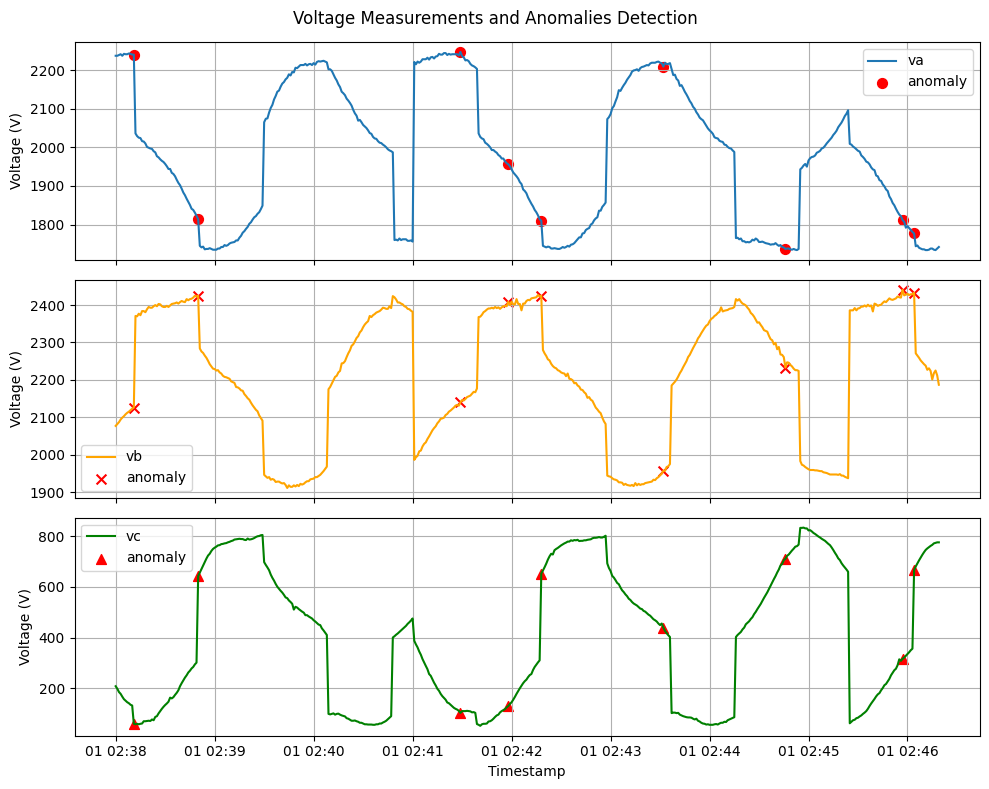

In [99]:

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot va, vb, vc in separate subplots
axes[0].plot(dataset['timestamp'], dataset['va'], label='va')
axes[1].plot(dataset['timestamp'], dataset['vb'], label='vb', color='orange')
axes[2].plot(dataset['timestamp'], dataset['vc'], label='vc', color='green')

# Highlight anomalies
anomaly_timestamps = anomalies_df[anomalies_df['anomaly'] == 1]['timestamp']
anomaly_va = dataset.loc[dataset['timestamp'].isin(anomaly_timestamps)]['va']
anomaly_vb = dataset.loc[dataset['timestamp'].isin(anomaly_timestamps)]['vb']
anomaly_vc = dataset.loc[dataset['timestamp'].isin(anomaly_timestamps)]['vc']

axes[0].scatter(anomaly_timestamps, anomaly_va, color='red', label='anomaly', s=50, marker='o')
axes[1].scatter(anomaly_timestamps, anomaly_vb, color='red', label='anomaly', s=50, marker='x')
axes[2].scatter(anomaly_timestamps, anomaly_vc, color='red', label='anomaly', s=50, marker='^')

# Add grid, labels, and titles
for ax in axes:
    ax.grid(True)
    ax.set_ylabel('Voltage (V)')
    ax.legend()

axes[2].set_xlabel('Timestamp')
fig.suptitle('Voltage Measurements and Anomalies')

plt.tight_layout()
plt.show()


In [95]:
test_dataset

,timestamp,va,vb,vc,y
9980,2024-01-01 02:46:20,1746,2205,777,1576.000000
9981,2024-01-01 02:46:21,1747,2202,802,1583.666667
9982,2024-01-01 02:46:22,1751,2195,776,1574.000000
9983,2024-01-01 02:46:23,1759,2196,778,1577.666667
9984,2024-01-01 02:46:24,1762,2186,777,1575.000000
9985,2024-01-01 02:46:25,1762,2189,778,1576.333333
9986,2024-01-01 02:46:26,1756,2183,781,1573.333333
9987,2024-01-01 02:46:27,1769,2182,782,1577.666667
9988,2024-01-01 02:46:28,1772,2174,784,1576.666667
9989,2024-01-01 02:46:29,1776,2168,786,1576.666667


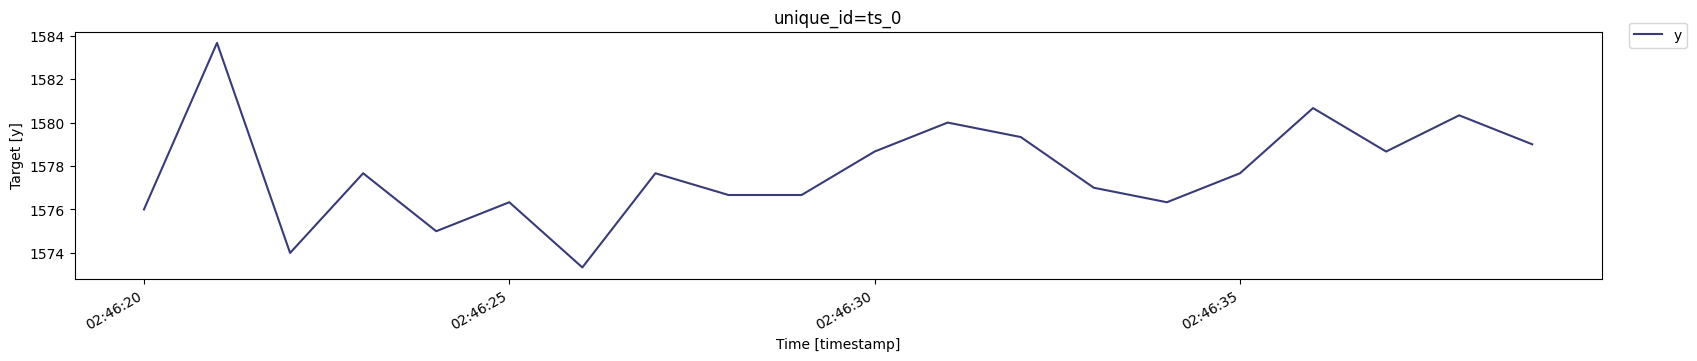

In [94]:
#plot real values
nixtla_client.plot(
    df=test_dataset, 
    time_col='timestamp', 
    target_col="y"
)